In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [ ]:
cal = fetch_california_housing(as_frame=True)

In [ ]:
df = pd.DataFrame(cal.frame)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df[['MedHouseVal']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (8, 1)))
model.add(tf.keras.layers.Dense(30, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "relu"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8, 30)             60        
                                                                 
 dense_6 (Dense)             (None, 8, 1)              31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "MeanSquaredError", optimizer = tf.keras.optimizers.Adam())

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
452/452 [==============================] - 3s 5ms/step - loss: 8.7592 - val_loss: 5.0515
Epoch 2/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0865 - val_loss: 5.0507
Epoch 3/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0867 - val_loss: 5.0521
Epoch 4/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0870 - val_loss: 5.0535
Epoch 5/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0873 - val_loss: 5.0506
Epoch 6/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0873 - val_loss: 5.0522
Epoch 7/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0875 - val_loss: 5.0511
Epoch 8/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0883 - val_loss: 5.0540
Epoch 9/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0883 - val_loss: 5.0508
Epoch 10/20
452/452 [==============================] - 2s 4ms/step - loss: 5.0885 - val_loss: 5.0620

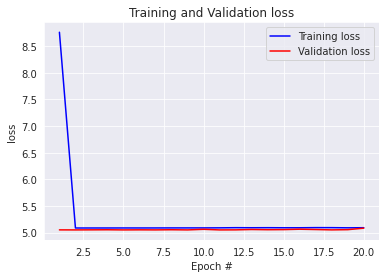

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
feature1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']]
feature2 = df[['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [ ]:
InputA = tf.keras.Input(shape=(5,1))
InputB = tf.keras.Input(shape=(6,1))
x = tf.keras.layers.Dense(30, activation = "relu")(InputB)
x1 = tf.keras.layers.Dense(30, activation = "relu")(x)
x2 = tf.keras.layers.Flatten()(x1)
x3 = tf.keras.layers.Flatten()(InputA)
a_b = tf.keras.layers.concatenate([x2, x3],name="concatenated_layer")
x4 = tf.keras.layers.Dense(1, activation = "relu")(a_b)
model = tf.keras.models.Model(inputs=[(InputA, InputB)],outputs=[x4])


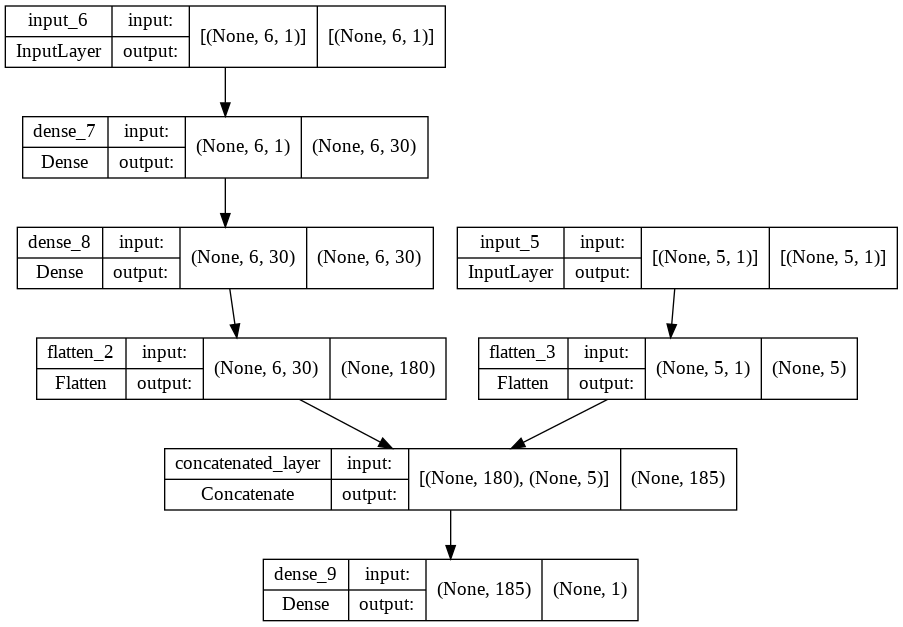

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 6, 30)        60          ['input_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 6, 30)        930         ['dense_7[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                            

In [ ]:
model.compile(loss = "MeanSquaredError", optimizer = tf.keras.optimizers.Adam())

In [ ]:
history = model.fit([feature1, feature2], y, epochs=20, validation_split = 0.3)

Epoch 1/20
452/452 [==============================] - 3s 5ms/step - loss: 5.2900 - val_loss: 6.5652
Epoch 2/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 3/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 4/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 5/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 6/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 7/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 8/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 9/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652
Epoch 10/20
452/452 [==============================] - 2s 4ms/step - loss: 5.2011 - val_loss: 6.5652

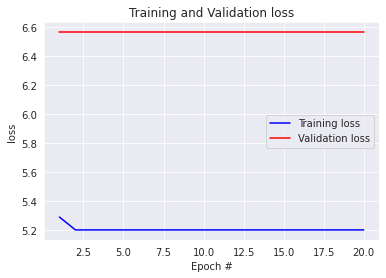

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
#In the former model, our validation loss is less than training loss but in the latter, the validation loss is greater than training loss.
#In the latter, after the first few epochs there is no major change in either training or validation loss.